# Статистические методы прогноза временных рядов

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Часть 2

Модель ARMA (ARIMA)

$$y_t = \alpha_1 y_{t-1} + ... + \alpha_p y_{t-p} + ɛ_t + \beta_1 ɛ_{t-1} + ... + \beta_q ɛ_{t-q}$$

In [ ]:
dj_df = pd.read_csv(
    'https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/sample_ts.csv',
    parse_dates=['Date']).set_index('Date')
dj_df.head()

,Value
Date,
1977-09-02,872.31
1977-09-09,857.04
1977-09-16,856.81
1977-09-23,839.14
1977-09-30,847.11


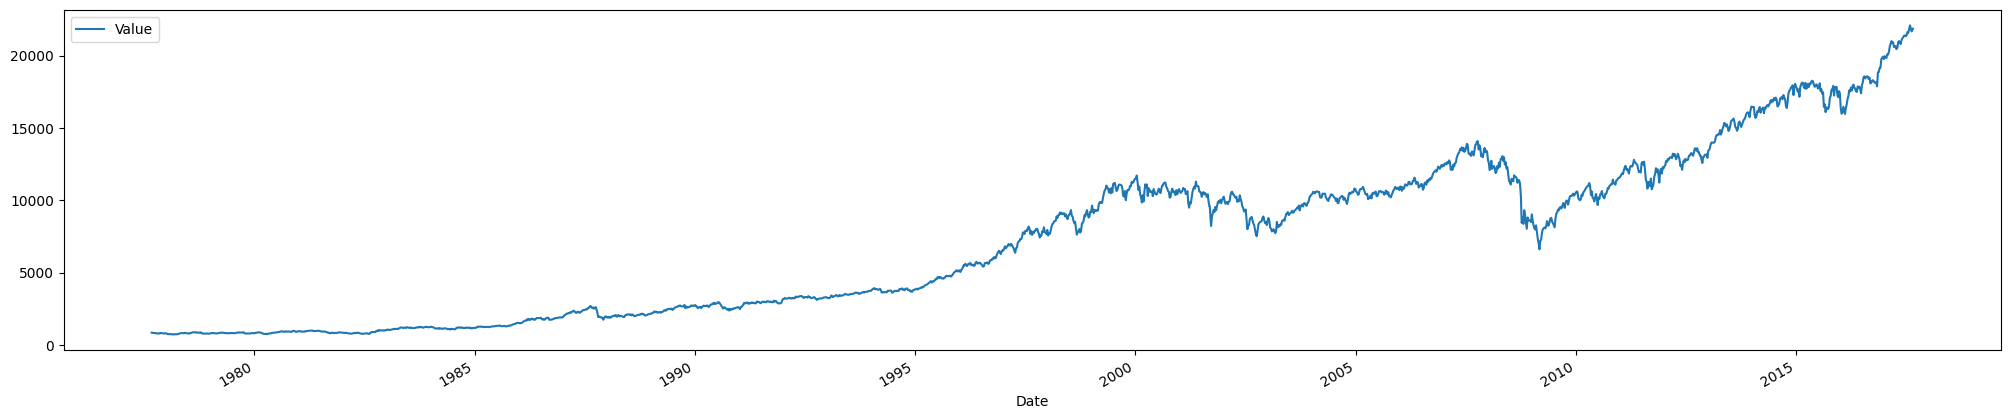

In [ ]:
dj_df.plot(figsize = (25,5));

In [ ]:
from statsmodels.tsa import stattools

def check_adf_stat(ts):
  df_stat = stattools.adfuller(ts)
  print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
        (df_stat[0], df_stat[1], df_stat[4]))

  if df_stat[0] > df_stat[4]['5%']:
      print('Есть единичные корни - ряд нестационарный')
  else:
      print('Единичных корней нет, ряд стационарен')

check_adf_stat(dj_df)

The Augmented Dickey-Fuller test statistic 1.156636, 
pvalue: 1.00
critical values: {'1%': -3.4335345735350664, '5%': -2.862946794168607, '10%': -2.567518913543354}
Есть единичные корни - ряд нестационарный


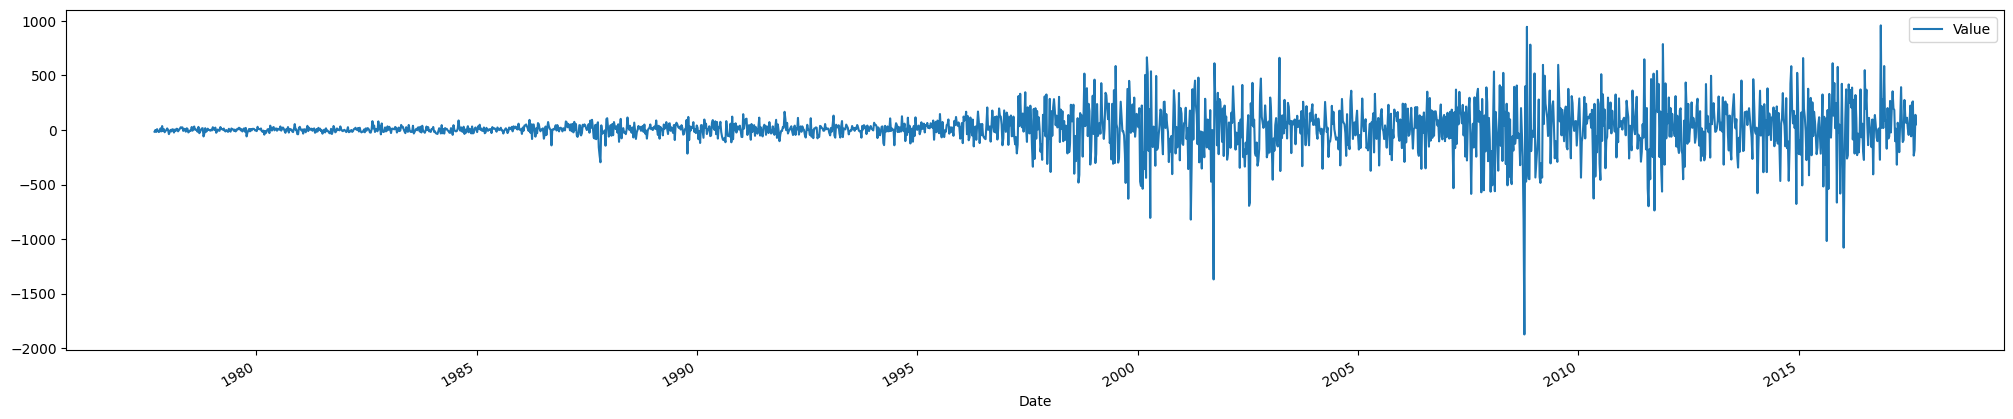

In [ ]:
diff_dj_df = (dj_df - dj_df.shift(1))[1:]
diff_dj_df.plot(figsize=(25,5));

In [ ]:
check_adf_stat(diff_dj_df)

The Augmented Dickey-Fuller test statistic -8.097898, 
pvalue: 0.00
critical values: {'1%': -3.4335345735350664, '5%': -2.862946794168607, '10%': -2.567518913543354}
Единичных корней нет, ряд стационарен


In [ ]:
# d = 1

Autocorrelaction function (ACF)

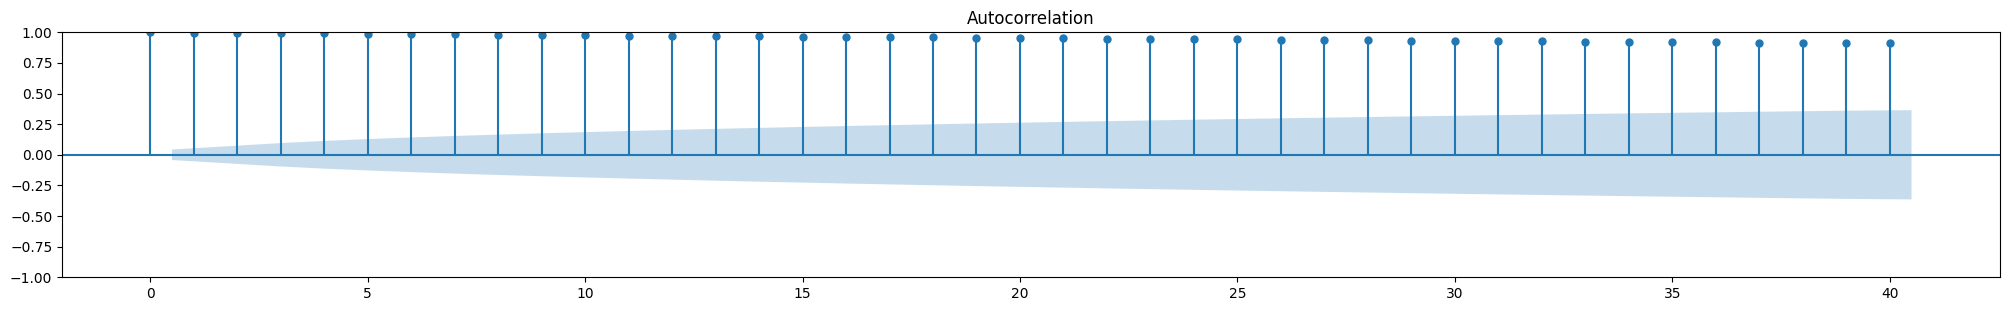

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dj_df, lags=40, ax = ax1);

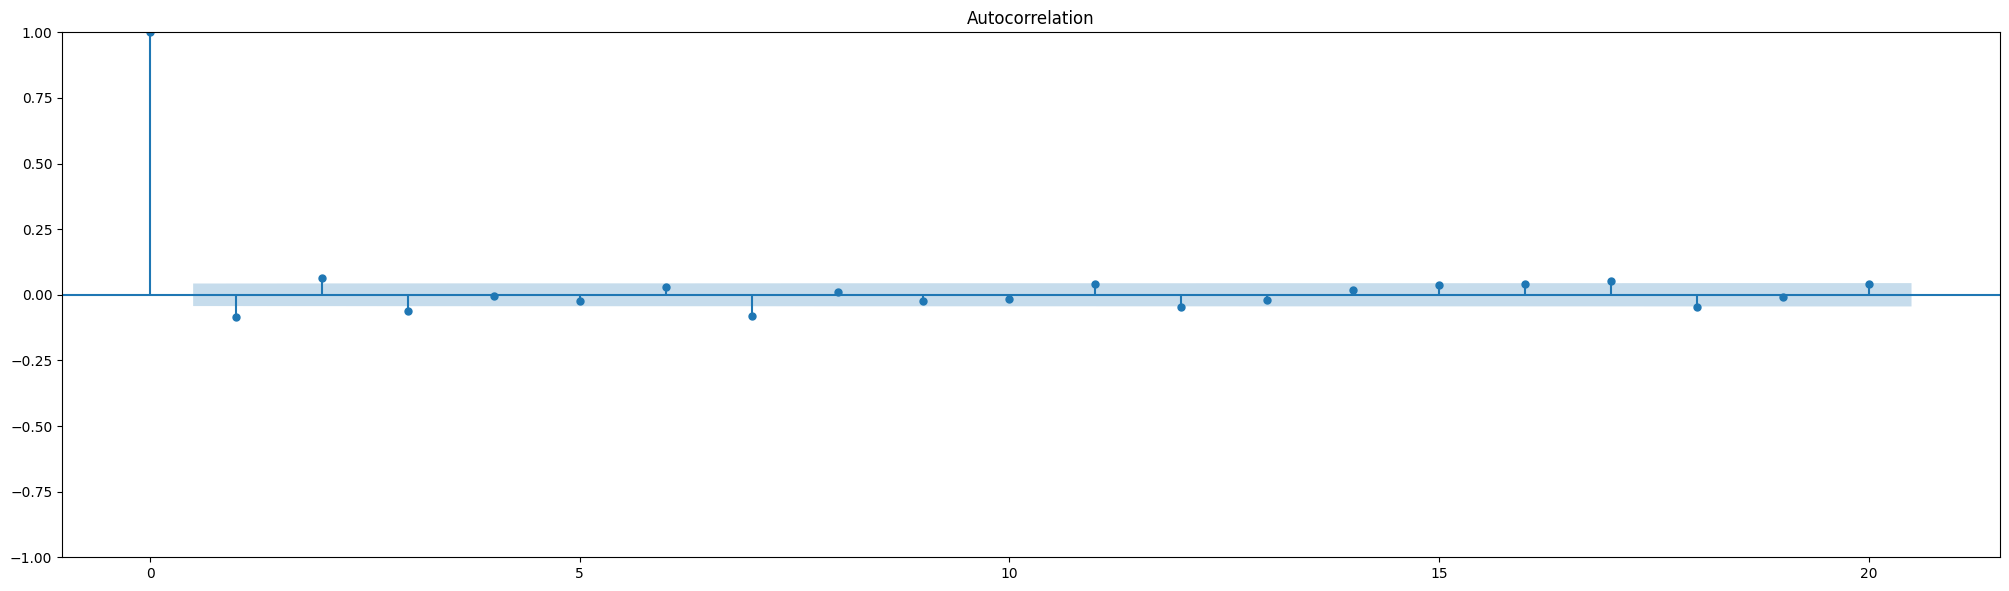

In [ ]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_dj_df, lags=20, ax = ax1)

Partial Autocorrelation function (PACF)

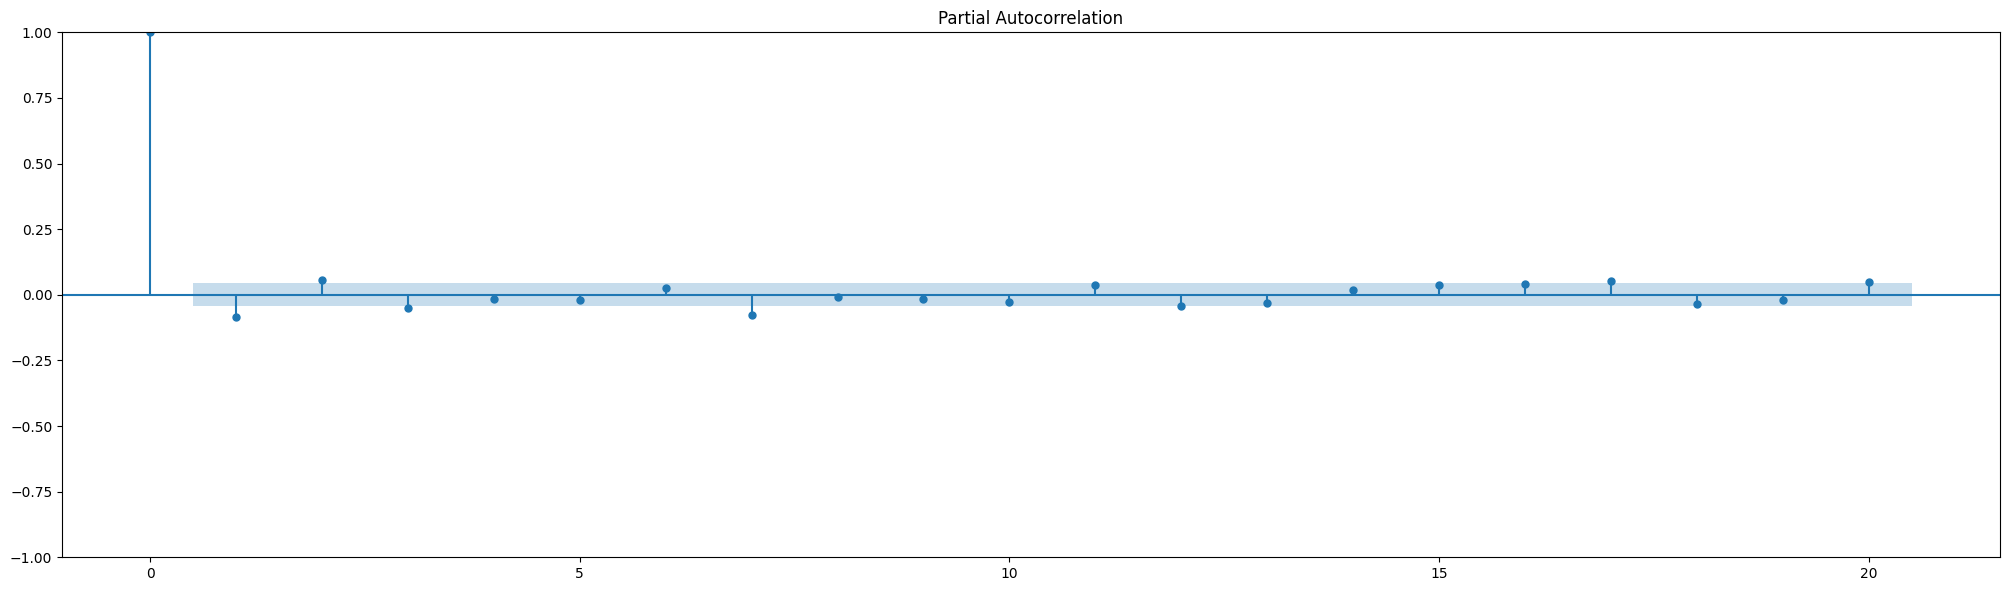

In [ ]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(diff_dj_df, lags=20, ax = ax1)

По графикам ACF и PACF можно определить значения гиперпараметров p и q в ARMA-модели:

* $p$ - номер последнего значимого лага в PACF (за период $s$)
* $q$ - номер последнего значимого лага в ACF (за период $s$)

По графикам ACF и PACF, построенным для нашей модели, кажется, что последние значимые лаги по обоим графикам - это 1, то есть
$p=0, 1, ..., 7$ и $q=0, 1, ..., 7$.

Кроме того, если мы не хотим заморачиваться с обратным преобразованием, то лучше использовать модель ARIMA(p,d,q),
где $d$ - число дифференцирований ряда.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dj_df['Value'], order=(1,1,1)).fit()

print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 2082
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13834.872
Date:                Tue, 28 May 2024   AIC                          27675.743
Time:                        18:02:01   BIC                          27692.665
Sample:                             0   HQIC                         27681.944
                               - 2082                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7540      0.058    -13.084      0.000      -0.867      -0.641
ma.L1          0.6804      0.063     10.778      0.000       0.557       0.804
sigma2       3.49e+04    451.323     77.335      0.0

Нарисуем кусочек ряда - правильный ответ и прогноз:

опция `dynamic=False` означает, что прогноз строится на каждый момент вперед относительно правильного ответа.

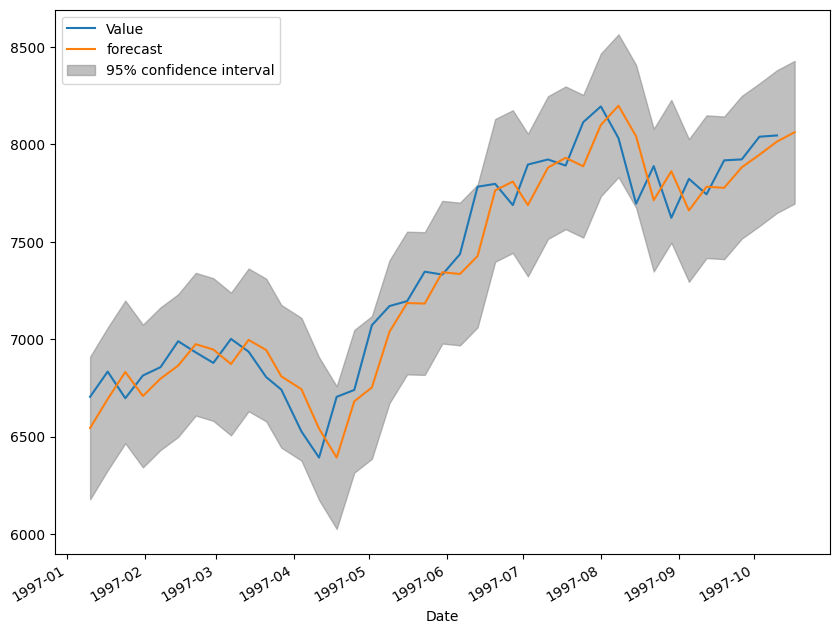

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(10, 8))
ax = dj_df['Value'].iloc[1010:1050].plot(ax=ax)

fig = plot_predict(model, start=1010, end=1050, dynamic=False, ax=ax)
legend = ax.legend(loc="upper left")